In [1]:
import numpy as np
import pandas as pd

In this notebook we will take the *swiggy_scrap_uncleaned.csv* and clean the data.

After that we will try to answer following questions.
* Which are the top 10 most ordered foods?
* Which item in the top 10 list is delivered fastest?
* Which are the top 10 pairs of food that is ordered together?
* Which hotel delivered pizza fastest?

In [2]:
df=pd.read_csv("swiggy_scrap_uncleaned.csv")
df.head()

,hotel_name,rating_and_delivery_time,food_type,location,offer
0,McDonald's,4.5 • 27 mins,"Burgers, Beverages, Cafe, Desserts",Kandivali East,30% OFF UPTO ₹75
1,KFC,4.2 • 30 mins,"Burgers, Biryani, American, Snacks, Fast Food",Kandivali East,40% OFF UPTO ₹80
2,Domino's Pizza,4.3 • 25 mins,"Pizzas, Italian, Pastas, Desserts",Thakur Village,₹150 OFF ABOVE ₹299
3,Charcoal Eats - Biryani & Beyond,4.3 • 24 mins,"Biryani, Kebabs, Hyderabadi, North Indian",Malad Kan East,50% OFF UPTO ₹100
4,Sandwizzaa,4.6 • 22 mins,"Snacks, Fast Food, Beverages, Jain",Kandivali East,60% OFF UPTO ₹120


Data cleaning steps:
* Add a column named 'order_id'.
* Split column 'rating_and_delivery_time' into two columns 'rating' and 'delivery_time_min'.
* Convert dtypes of the columns 'rating' and 'delivery_time_min' into numeric and fill the missing values.

In [3]:
#Adding a new column at the beginning called order_id
df.insert(0, 'order_id', range(1, len(df) + 1))

In [4]:
# Splitting the column and creating new columns
df[['rating', 'delivery_time']] = df['rating_and_delivery_time'].str.split(' • ', expand=True)

There were certain rows where rating and hence the separator was missing. This lead to delivery time being put in rating column. Lets see an example and correct this.

In [5]:
# Example before correction
df[df['hotel_name'] == 'Tiffin Box'].head()

,order_id,hotel_name,rating_and_delivery_time,food_type,location,offer,rating,delivery_time
114,115,Tiffin Box,27 mins,"Biryani, Beverages, North Eastern",Malad Kan East,30% OFF UPTO ₹75,27 mins,None


In [6]:
# Move entries with 'mins' from 'rating' to 'delivery_time'
df.loc[df['rating'].str.contains('mins'), ['rating', 'delivery_time']] = df.loc[df['rating'].str.contains('mins'), ['delivery_time', 'rating']].values

# Example after correction
df[df['hotel_name'] == 'Tiffin Box'].head()

,order_id,hotel_name,rating_and_delivery_time,food_type,location,offer,rating,delivery_time
114,115,Tiffin Box,27 mins,"Biryani, Beverages, North Eastern",Malad Kan East,30% OFF UPTO ₹75,None,27 mins


There are certain rows where the time is written in range like 11-21 mins. We assume the delivery time to be the maximum in the range and clean the data.

In [7]:
# Example before correction
df[df['hotel_name'] =='NH1 Bowls - Highway To North']

,order_id,hotel_name,rating_and_delivery_time,food_type,location,offer,rating,delivery_time
26,27,NH1 Bowls - Highway To North,4.7 • 11-21 mins,"North Indian, Punjabi, Home Food",Kandivali East,50% OFF UPTO ₹100,4.7,11-21 mins


In [8]:
# Extract 'mins' part using regular expression
df['delivery_time'] = df['delivery_time'].str.extract(r'(\d+\s*mins)')

# Example afer correction
df[df['hotel_name'] =='NH1 Bowls - Highway To North']

,order_id,hotel_name,rating_and_delivery_time,food_type,location,offer,rating,delivery_time
26,27,NH1 Bowls - Highway To North,4.7 • 11-21 mins,"North Indian, Punjabi, Home Food",Kandivali East,50% OFF UPTO ₹100,4.7,21 mins


In [9]:
# Remove mins from delivery_time column
df['delivery_time'] = df['delivery_time'].str.extract(r'(\d+)')

# Rename the column
df.rename(columns={'delivery_time': 'delivery_time_min'}, inplace=True)

# Delete column 'rating_and_delivery_time'
df.drop('rating_and_delivery_time', axis = 1, inplace = True)

In [10]:
columns_to_move = ['rating', 'delivery_time_min']

# Reindex the DataFrame to move the columns
new_columns = ['order_id'] + columns_to_move + [col for col in df.columns if col not in columns_to_move + ['order_id']]
df = df.reindex(columns=new_columns)

In [11]:
# Check the datatype of each column
df.dtypes

order_id              int64
rating               object
delivery_time_min    object
hotel_name           object
food_type            object
location             object
offer                object
dtype: object

In [12]:
# Convert dtypes of 'rating' and 'delivery_time_min' into numeric and fill NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Replace NaN values with the mean rating
df['rating'] = df['rating'].fillna(df['rating'].mean())

df['delivery_time_min'] = pd.to_numeric(df['delivery_time_min'])

df.dtypes

order_id               int64
rating               float64
delivery_time_min      int64
hotel_name            object
food_type             object
location              object
offer                 object
dtype: object

In [13]:
# Make 'food_type' into list
df['food_type'] = df['food_type'].str.split(', ')

# This is cleaned dataframe
df.head()

,order_id,rating,delivery_time_min,hotel_name,food_type,location,offer
0,1,4.5,27,McDonald's,"[Burgers, Beverages, Cafe, Desserts]",Kandivali East,30% OFF UPTO ₹75
1,2,4.2,30,KFC,"[Burgers, Biryani, American, Snacks, Fast Food]",Kandivali East,40% OFF UPTO ₹80
2,3,4.3,25,Domino's Pizza,"[Pizzas, Italian, Pastas, Desserts]",Thakur Village,₹150 OFF ABOVE ₹299
3,4,4.3,24,Charcoal Eats - Biryani & Beyond,"[Biryani, Kebabs, Hyderabadi, North Indian]",Malad Kan East,50% OFF UPTO ₹100
4,5,4.6,22,Sandwizzaa,"[Snacks, Fast Food, Beverages, Jain]",Kandivali East,60% OFF UPTO ₹120


### **Answering the questions**

**1. Which are the top 10 most ordered foods?**

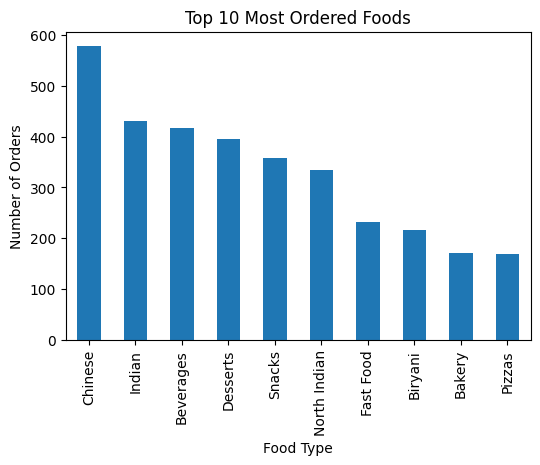

In [14]:
import matplotlib.pyplot as plt

df_food = df.explode('food_type').reset_index(drop=True)

top_10_foods = df_food['food_type'].value_counts().head(10)

fig = plt.figure(figsize=[6,4])
top_10_foods.plot(kind = 'bar')
plt.xlabel('Food Type')
plt.ylabel('Number of Orders')
plt.title('Top 10 Most Ordered Foods')
plt.xticks(rotation = 90)

plt.show()

**2. Which item in the top 10 list is delivered fastest?**

In [15]:
top_10_list = list(top_10_foods.index)

top_10_df = df_food[df_food['food_type'].isin(top_10_list)]

top_10_grouped = top_10_df.groupby('food_type')['delivery_time_min'].mean().reset_index()
top_10_grouped.sort_values(by = 'delivery_time_min', inplace = True)

top_10_grouped

,food_type,delivery_time_min
0,Bakery,37.300000
4,Desserts,38.070707
1,Beverages,40.678657
9,Snacks,40.778711
5,Fast Food,42.607759
8,Pizzas,43.071429
2,Biryani,44.004651
6,Indian,44.041860
7,North Indian,44.074627
3,Chinese,44.610727


Hence, Bakery items are delivered fastest in the top 10 food list.

**3. Which are the top 10 pairs of food that is ordered together?**

<Figure size 800x600 with 0 Axes>

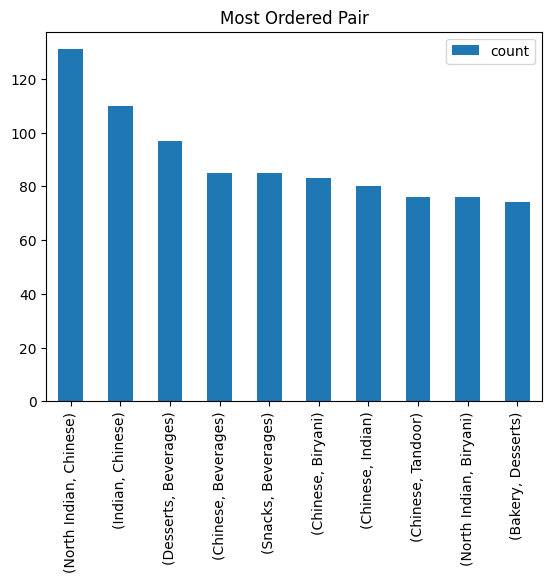

In [16]:
from itertools import combinations
from collections import Counter

# Define a function to count pairs of food types
def count_food_pairs(food_list):
    if len(food_list) < 2:
        return None
    pairs = list(combinations(food_list, 2))
    return Counter(pairs)

# Apply the function to each group
pair_counts = df['food_type'].apply(count_food_pairs).dropna()

# Combine and sum the counters for each pair
total_counts = Counter()
for counter in pair_counts:
    total_counts += counter

# Convert Counter object to dictionary
counts_dict = dict(total_counts)

# Convert dictionary to DataFrame
pair_counts_df = pd.DataFrame.from_dict(counts_dict, orient='index', columns=['count'])
pair_counts_df.sort_values(by='count', ascending=False, inplace=True)

plt.figure(figsize=[8,6])
pair_counts_df.head(10).plot(kind = 'bar')
plt.title('Most Ordered Pair')
plt.xticks(rotation = 90)

plt.show()

**4. Which hotel delivered pizza fastest?**

In [17]:
pizza_df = df_food[df_food['food_type'] == 'Pizzas']
pizza_df = pizza_df.sort_values(by = 'delivery_time_min')
pizza_df.head()

,order_id,rating,delivery_time_min,hotel_name,food_type,location,offer
156,50,4.100000,18,The Netrik's Joint,Pizzas,Malad Kan West,30% OFF UPTO ₹75
116,38,4.300000,21,Breadkraft,Pizzas,Mumbai,30% OFF UPTO ₹75
1698,461,3.900000,23,Food Costa,Pizzas,"Kandivali (East), Thakur Village",20% OFF UPTO ₹50
4197,1351,4.400000,24,MOGO Pizza,Pizzas,Kandivali East,50% OFF UPTO ₹100
4203,1352,4.133215,24,Oven Bake Pizza,Pizzas,Malad Kan East,50% OFF UPTO ₹100
